In [2]:
from transformers import CLIPVisionModel, AutoTokenizer
from changechat.model import *

/root/miniconda3/envs/geochat/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[2024-08-05 22:04:27,060] [INFO] [real_accelerator.py:110:get_accelerator] Setting ds_accelerator to cuda (auto detect)


In [3]:
tokenizer = AutoTokenizer.from_pretrained("hf-models/geochat-7b")

In [19]:
tokenizer.add_tokens("<changed>", special_tokens=True)
tokenizer.vocab_size

32000

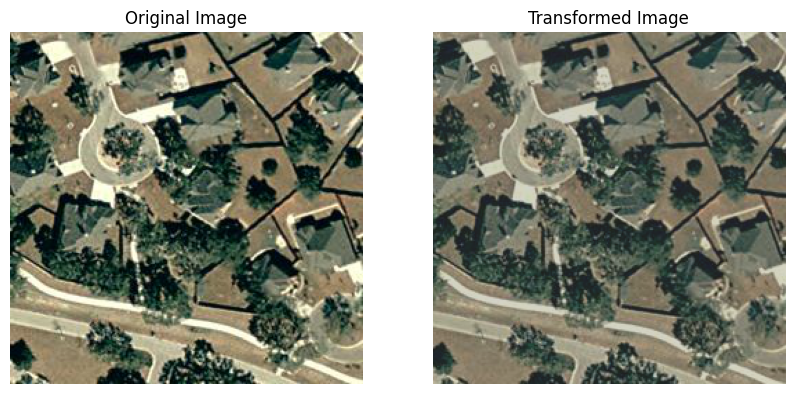

In [41]:
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# 打开图像
image = Image.open('load/images/train/A/train_000001.png')

# 定义原始图像显示
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis('off')

# 定义图像增强的变换组合
transform = transforms.Compose([
    transforms.RandomCrop(size=(252, 252)),  # 随机裁剪为252x252的图像
    transforms.ColorJitter(brightness=0.35, contrast=0.35),  # 随机调整亮度和对比度
])

# 应用变换
transformed_image = transform(image)

# 显示变换后的图像
plt.subplot(1, 2, 2)
plt.title("Transformed Image")
plt.imshow(transformed_image)
plt.axis('off')

plt.show()

In [5]:
import json
datapath = "load/LevirCCcaptions-v2.json"

In [10]:
# references
rslt = []
with open(datapath, 'r') as j:
    gt_raw = json.load(j)

for row in gt_raw:
    if row['changeflag'] != row['changeflag2'] and row['filepath']:
        rslt.append(row)

with open("load/LevirCCcaptions-error.json", 'w') as f:
    json.dump(rslt, f)

NameError: name 'w' is not defined

In [29]:
# answer yes or no
hypotheses_all = []
hypotheses_no_changed = []
hypotheses_changed = []

answer_path = "/root/autodl-tmp/LEVIR-MCI-dataset/benchmarks/answer_v3_conv_r1_0701.jsonl"

with open(answer_path, 'r') as file:
    for gt, line in zip(gt_raw,file):
        if answer_path.endswith(".jsonl"):
            entry = json.loads(line)
            answer = entry['answer'].replace('.','').strip()
        else:
            answer = line.strip()

        if gt['changeflag'] == 0:
            hypotheses_no_changed.append(answer)
        else:
            hypotheses_changed.append(answer)
        
        hypotheses_all.append(answer)

In [38]:
# answer caption
ours_cap_list = []

answer_path = "/root/autodl-tmp/LEVIR-MCI-dataset/benchmarks/answer_v3_0701.jsonl"

with open(answer_path, 'r') as file:
    for gt, line in zip(gt_raw,file):
        if answer_path.endswith(".jsonl"):
            entry = json.loads(line)
            answer = entry['answer'].replace('.','').strip()
        else:
            answer = line.strip()
        
        ours_cap_list.append(entry['image_id'][0].split("/")[-1] + ": " + answer)

In [16]:
print(hypotheses_no_changed.count("No") / len(hypotheses_no_changed))
print(hypotheses_changed.count("Yes") / len(hypotheses_changed))

0.827979274611399
0.9688796680497925


In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# 示例列表
predicted = hypotheses_all
actual = references_all

accuracy = accuracy_score(actual, predicted)
precision = precision_score(actual, predicted, pos_label="Yes")
recall = recall_score(actual, predicted, pos_label="Yes")
f1 = f1_score(actual, predicted, pos_label="Yes")

print(f"准确率: {accuracy}")
print(f"精确率: {precision}")
print(f"召回率: {recall}")
print(f"F1 分数: {f1}")

准确率: 0.8983929497148782
精确率: 0.8490909090909091
召回率: 0.9688796680497925
F1 分数: 0.9050387596899225


## 找出所有错误的例子

In [39]:
for cap, x, y in zip(ours_cap_list, hypotheses_all, references_all):
    if x == "Yes" and y == "No":
        print(cap)

test_000022.png: a building appears in the woods in the top
test_000055.png: a house is built in the woods in the bottom right
test_000056.png: a small house appears in the lower-right corner of the scene
test_000059.png: a small house has been built near the original house
test_000060.png: a house is built on the bareland
test_000067.png: some trees in the center are removed
test_000087.png: a small house has been built in the corner of the scene
test_000090.png: a small house appears in the lower-right corner of the scene
test_000094.png: a house is built in the woods along the road
test_000095.png: a small house appears in the forest
test_000100.png: a small house has been built near the large buildings
test_000114.png: two houses are built on the bareland along the road
test_000118.png: two more houses appear along the road
test_000145.png: two houses are built in the woods
test_000146.png: a building appears in the woods in the middle
test_000170.png: a house is built next to the 